predict prices for houses depending on their condition and parameters. Link to the competition, where you will find also all datasets from this notebook: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
# Now let's load all available data

# Our dataset, where we will train and sometimes test model
train = pd.read_csv('files/train.csv')

# Our dataset, for testing final model and uploading results into Kaggle
test = pd.read_csv('files/test.csv')

# How our final dataset should look
sample = pd.read_csv('files/sample_submission.csv')

# Description of all columns and their values
description = open('files/data_description.txt', 'r')

In [4]:
# BREAKING 4th Wall! 
# I decided to drop some features before work, cause they are useless for our models
to_drop = ['Electrical', 'HouseStyle', 'LotConfig', 'Neighborhood', 'CentralAir', 'Street']

train = train.drop(to_drop, axis = 1)
test = test.drop(to_drop, axis = 1)

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,NaN,Reg,Lvl,AllPub,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,NaN,Reg,Lvl,AllPub,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,NaN,IR1,Lvl,AllPub,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,NaN,IR1,Lvl,AllPub,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,NaN,IR1,Lvl,AllPub,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [7]:
train.shape

(1460, 75)

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We can see that there many missing values and values are not scaled

Also house prices are mostly between 130,000 and 215,000

81 columns - 38 numeric and 48 categorical, there are too many features

### Data Visualization

1) Let's check correlations between numeric features and house_priecs

In [9]:
corr_matr = train.corr()

corr_matr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

What We see here: OVerallQual is highly linear correlated with house price and also there a lot of features like that.
Let's visualize some of them

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015FEECBBE80>,
      dtype=object)

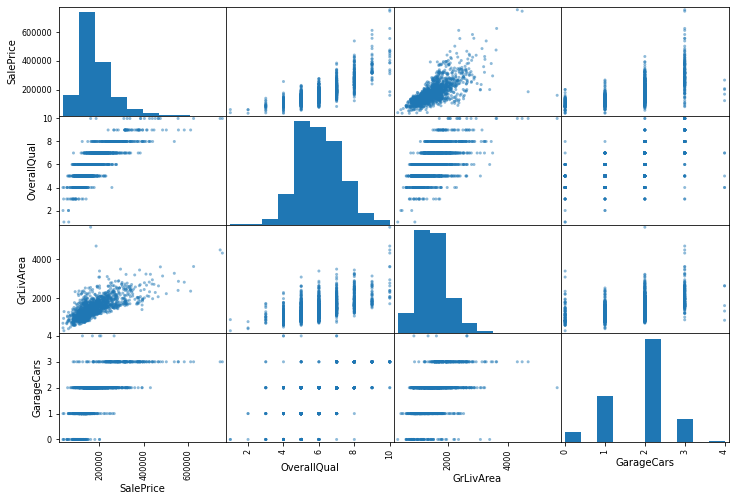

In [10]:
from pandas.plotting import scatter_matrix

features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']

scatter_matrix(train[features], figsize = (12, 8))


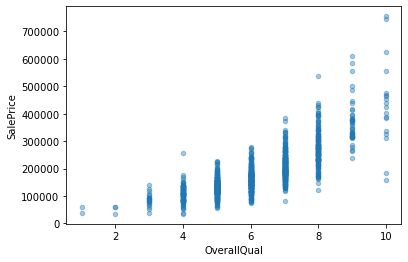

In [11]:
train.plot(kind = 'scatter', x = 'OverallQual', y = 'SalePrice', alpha = 0.4)

Initial test dataset is dedicated only to predict values and to load it on kaggle, so I would like to save little part of my training set just to observe results of my final model.
 Also, I think, OverallQual is best attribute for our model, so let's see how it is distributed among set

In [12]:
train['OverallQual'].value_counts(ascending = False)

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

As we can see it is normally distributed (bell-shape on central values), and i would like to save this proportion also in my test set

Here I have had one problem: for StratifiedShuffleSplit every class should at least have 2 members, but OverallQual == 1 in training set has only 2 members
I can just duplicate them and append to general set

In [13]:
overall_1 = train[train['OverallQual'] == 1]

overall_1

train = train.append(overall_1)

train = train.append(train[train['OverallQual'] == 2])

In [14]:
# For this, I can use StratifiedShuffleSplit

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)

def stratified_shuffle_split(dataset, attr):
    for train_index, test_index in split.split(dataset, attr):
        strat_train = dataset.iloc[train_index]
        strat_test = dataset.iloc[test_index]
    return (strat_train, strat_test)

(strat_train, strat_test) = stratified_shuffle_split(train, train['OverallQual'])

strat_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1297,1298,180,RM,35.0,3675,NaN,Reg,Lvl,AllPub,Gtl,...,0,NaN,NaN,NaN,0,6,2006,New,Partial,140000
1403,1404,20,RL,49.0,15256,NaN,IR1,Lvl,AllPub,Gtl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,282922
312,313,190,RM,65.0,7800,NaN,Reg,Lvl,AllPub,Gtl,...,0,NaN,MnPrv,NaN,0,5,2006,WD,Normal,119900
613,614,20,RL,70.0,8402,NaN,Reg,Lvl,AllPub,Gtl,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,147000
275,276,50,RL,55.0,7264,NaN,Reg,Lvl,AllPub,Gtl,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,205000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,311,60,RL,NaN,7685,NaN,IR1,Lvl,AllPub,Gtl,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,165600
7,8,60,RL,NaN,10382,NaN,IR1,Lvl,AllPub,Gtl,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
584,585,50,RM,51.0,6120,NaN,Reg,Lvl,AllPub,Gtl,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,133000
106,107,30,RM,60.0,10800,Grvl,Reg,Lvl,AllPub,Gtl,...,0,NaN,NaN,Shed,450,8,2007,WD,Normal,100000


In [15]:
# Now let's check proprtions

strat_test['OverallQual'].value_counts() / len(train)

5     0.053925
6     0.051195
7     0.043686
8     0.022526
4     0.015700
9     0.006143
10    0.002730
3     0.002730
2     0.000683
1     0.000683
Name: OverallQual, dtype: float64

Ok now

### Handle categorical and numerical columns

There are categorical and numerical columns and we need them prepare differently and more automatically we handle them, better it is

In [16]:
strat_train_X = strat_train.drop('SalePrice', axis = 1)

strat_train_y = strat_train['SalePrice'].copy()

In [17]:
strat_train_X.drop('Id', axis = 1, inplace = True)

Divide columns by type

In [18]:
cat_columns = strat_train_X.dtypes[strat_train_X.dtypes == 'object'].index

num_columns = list(set(strat_train_X.columns) - set(cat_columns))

In [19]:
len(num_columns)

36

### Handle num values

There are important steps in pre-processing numerical values: Fill na values, Scale them.

1. Fill missing values; There is Imputer class in Sklearn

In [20]:
from sklearn.impute import SimpleImputer

# As strategy to fill na values, i will pick median values of column

imputer = SimpleImputer(strategy= 'median')

# Imputer is ready, lately I will use it as part of Pipeline

Scale values: It will be hard for model to learn on features with different scales, so I will use standardization:
        x - mean / stand. deviation

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scaler is ready, lately I will use it as part of Pipeline

### Categorical values

Most of models can not directly work with non-numerical data, so I need to transform it.
One-hot encoding will help me

One-hot creates n*m matrix out of one categorical column: where n - is number of samples and m is number of unique attributes in that column. all values can be either 0 or 1 

I almost forget about NAN values in categorical columns, most of them in context mean that there is no attribute in this particluar house, i.e., Most of houses do not have pool so column mostly filled with NaN values. I just fill them 'No' value 

In [22]:
from sklearn.preprocessing import OneHotEncoder

Next we should be able to divide categorical and numerical columns.
 Create a class for this purpose

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names): # Class takes name of columns as input
        self.attribute_names = attribute_names
        
    def fit(self, X, y = None): 
       
        # as Pipeline takes classes with fit and transform methods, we need to create fit even if we will not use
        return self
    
    def transform(self, X): # Transform takes whole X and return only columns that are in list as DataFrame and return np array
        return X[self.attribute_names].values

Our DataFrameSelector will transform the data by selecting the desired attributes, dropping the rest, and converting the resulting DataFrame to a NumPy array. With this, you can easily write a pipeline that will take a Pandas DataFrame and handle only the numerical values: the pipeline would just start with a DataFrameSelector to pick only the numerical attributes

### Pipeline
Pipeline as it name says, takes list of actions to perform and goes step by step

In [24]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_columns)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_columns)),
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('one_hot_encoder', OneHotEncoder(sparse = False, handle_unknown = 'ignore'))
])

After that we need to union, combine that result and for this purpose we have FeatureUnion class from pipeline

In [25]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

# After that, we can run whole pipeline simply:

data_prepared = full_pipeline.fit_transform(strat_train_X)

data_prepared.shape

(1172, 252)

Now we have pre-processed data let's move on to models

### Select and Train data

Our task is Regression, batch type cause we need it only to take output and submit into kaggle and as we have train data with labels, it is supervised learning

First I wanna go to LinearRegression

In [26]:
labels = strat_train_y.copy()

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [28]:
lin_reg.fit(data_prepared, labels)

LinearRegression()

In [29]:
# Check result

some_data = strat_train_X.iloc[:5]
some_labels = labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

print('Predictions', lin_reg.predict(some_data_prepared))
print('Actual values', some_labels.values)

Predictions [237968. 153088. 260480. 144016. 206784.]
Actual values [178400 150750 240000 151000 193500]


It worked, but I think this model may overfit, let's check it out with MSE

In [30]:
import numpy as np

In [31]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(data_prepared)

lin_mse = mean_squared_error(labels, predictions)

np.sqrt(lin_mse)

19626.176788917128

It makes error in general 17631, it is less than I expected, so let's check it's actual ability to make predictions using cross_validation

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, data_prepared, labels, scoring = 'neg_mean_squared_error', cv = 10)

# What I've done above is - get cross_val_score: Cross-validation is to split set to 10 pieces and each of them will act as test other 9 as train and get scoring result

lin_rmse_scores = np.sqrt(-scores)

lin_rmse_scores

array([8.72251499e+13, 2.16273091e+15, 6.72494848e+13, 8.05143822e+15,
       4.26972959e+15, 4.90984486e+14, 4.85386907e+15, 2.01834028e+15,
       9.83472074e+14, 5.72305951e+14])

In [33]:
# Let's take a look at results

def display_scores(scores):
    print("Scores ", scores)
    print("Mean ", scores.mean())
    print('Std ', scores.std())
    
display_scores(lin_rmse_scores)

Scores  [8.72251499e+13 2.16273091e+15 6.72494848e+13 8.05143822e+15
 4.26972959e+15 4.90984486e+14 4.85386907e+15 2.01834028e+15
 9.83472074e+14 5.72305951e+14]
Mean  2355734522054674.5
Std  2478315802048481.5


 That is absolutely insane result, meaning that Linear Regression can not handle this type of set (may be many non-linear correlations)

Now, I want to use best tools to predict that I know now they are: XGBoost and RandomForestRegressor. Both of them are ensembles of simple models.
    I do not know Neural Network yet, so I won't use it

XGBoost VERSUS RandomForestRegressor

RandomForestRegressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

forests_reg = RandomForestRegressor()

forests_reg.fit(data_prepared, labels)

forests_scores = cross_val_score(forests_reg, data_prepared, labels, scoring='neg_mean_squared_error', cv = 10)

forests_rmse = np.sqrt(-forests_scores)

display_scores(forests_rmse)

Scores  [27605.33892373 23651.04467169 25972.48959903 23300.18183994
 28442.48441232 27396.979443   26770.33299526 24397.86374843
 39757.23945266 27203.33070413]
Mean  27449.728579019567
Std  4428.9335836956425


Compared to simple Linear Regression, this looks pretty good

I want to compare XGBoost and RandomForestRegressor in their full capacity, so I am about to fine-tune this model with GridSearch

In [35]:
from sklearn.model_selection import GridSearchCV

params_grid = [
    {
        'n_estimators': [3, 10, 25],
        'max_features': [5, 20, 50, 100, 250],
        'max_depth': [4, 8]
    },
    {
        'bootstrap': [False],
        'n_estimators': [6, 12],
        'max_features': [10, 40, 60, 150]
    },
]

grid_search = GridSearchCV(forests_reg, params_grid, cv = 5, scoring = 'neg_mean_squared_error')

grid_search.fit(data_prepared, labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [4, 8],
                          'max_features': [5, 20, 50, 100, 250],
                          'n_estimators': [3, 10, 25]},
                         {'bootstrap': [False],
                          'max_features': [10, 40, 60, 150],
                          'n_estimators': [6, 12]}],
             scoring='neg_mean_squared_error')

In [36]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=40, n_estimators=12)

In [37]:
# Let's take a look to scores and parameters

cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

52020.99558453453 {'max_depth': 4, 'max_features': 5, 'n_estimators': 3}
46791.79044000727 {'max_depth': 4, 'max_features': 5, 'n_estimators': 10}
47045.612148779255 {'max_depth': 4, 'max_features': 5, 'n_estimators': 25}
39908.368359365 {'max_depth': 4, 'max_features': 20, 'n_estimators': 3}
37705.83656053659 {'max_depth': 4, 'max_features': 20, 'n_estimators': 10}
36865.97757767729 {'max_depth': 4, 'max_features': 20, 'n_estimators': 25}
38131.127087485045 {'max_depth': 4, 'max_features': 50, 'n_estimators': 3}
35475.101577154775 {'max_depth': 4, 'max_features': 50, 'n_estimators': 10}
33616.58956164409 {'max_depth': 4, 'max_features': 50, 'n_estimators': 25}
35304.450875063 {'max_depth': 4, 'max_features': 100, 'n_estimators': 3}
33713.4775256144 {'max_depth': 4, 'max_features': 100, 'n_estimators': 10}
33180.00198534764 {'max_depth': 4, 'max_features': 100, 'n_estimators': 25}
36164.02325694059 {'max_depth': 4, 'max_features': 250, 'n_estimators': 3}
34604.123870311356 {'max_depth'

In [38]:
%%time 

n_trees = [1] + list(range(10, 50, 5))

scoring = []

for n_tree in n_trees:
    estimator = RandomForestRegressor(n_estimators = n_tree, max_depth = 8, max_features = 100, random_state= 42)
    score = cross_val_score(estimator, data_prepared, labels, scoring = 'neg_mean_squared_error', cv = 5)
    
    score = score.mean()
    
    scoring.append(np.sqrt(-score))




Wall time: 16.9 s


In [39]:
scoring

[42661.806558673554,
 29188.575113132247,
 28896.17773306003,
 28758.282949451448,
 28677.57489207104,
 28548.93822341834,
 28536.3577220024,
 28509.212455382527,
 28527.179792543004]

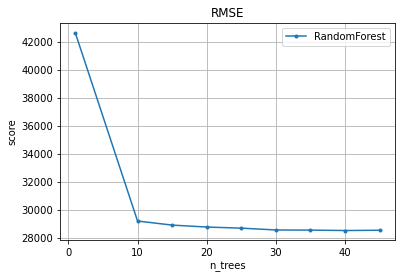

In [40]:
import matplotlib.pyplot as plt 

plt.plot(n_trees, scoring, marker = '.', label = 'RandomForest')
plt.grid()
plt.xlabel('n_trees')
plt.ylabel('score')
plt.title('RMSE')
plt.legend(loc='upper right')
plt.show()

plt.close()

XGBoost

In [41]:
import xgboost as xgb

In [42]:
xgb_reg = xgb.XGBRegressor()

params_grid = [
    {
        'nthread': [4],
        'learning_rate': [0.1],
        'max_depth': [7],
        'min_child_weight': [4],
        'n_estimators': [75, 100, 125, 200],
        'colsample_bytree': [0.5, 0.7, 0.8],
        'reg_alpha': [1.1, 1.2],
        'reg_lambda': [1.1, 1.2],
        'subsample': [0.7, 0.8, 0.9]
    }
]

xgb_grid = GridSearchCV(xgb_reg, params_grid, cv = 3, n_jobs=4)

xgb_grid.fit(data_prepared, labels)


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [43]:
n_trees_xgb = [1] + list(range(50, 200, 25))

scoring_xgb = []

for n_tree in n_trees_xgb:
    estimator = xgb.XGBRegressor(n_estimators = n_tree, n_jobs = 4, nthread = 4, booster='gbtree', 
                                 max_depth = 5, random_state = 0)
    score = cross_val_score(estimator, data_prepared, labels, scoring = 'neg_mean_squared_error', cv = 5)
    
    score = score.mean()
    
    scoring_xgb.append(np.sqrt(-score))
    


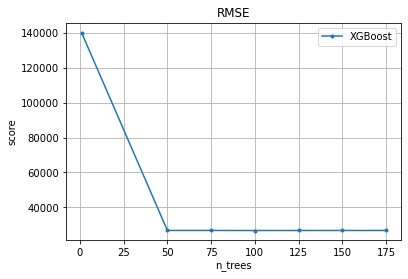

In [44]:
plt.plot(n_trees_xgb, scoring_xgb, marker = '.', label = 'XGBoost')
plt.grid()
plt.xlabel('n_trees')
plt.ylabel('score')
plt.title('RMSE')
plt.legend(loc='upper right')
plt.show()

plt.close()

### Time to Test our models

In [45]:
valid_vals = strat_test.drop(['Id', 'SalePrice'], axis = 1)
valid_labels = strat_test['SalePrice'].copy()

In [46]:
valid_prepared = full_pipeline.transform(valid_vals)

In [47]:
validation_pred_xgb = xgb_grid.best_estimator_.predict(valid_prepared)
validation_pred_forst = grid_search.best_estimator_.predict(valid_prepared)

In [48]:
from sklearn.metrics import mean_squared_error

xgb_err = np.sqrt(mean_squared_error(valid_labels, validation_pred_xgb))
forst_err = np.sqrt(mean_squared_error(valid_labels, validation_pred_forst))

print(xgb_err, forst_err)

# XGB won

36855.69585336005 39147.75716925509


This rmse is bigger than cross_val_score, but it's okay since it was new data - Now, let's get into our real test data

In [49]:
ids = test['Id']

test = test.drop('Id', axis = 1)

In [50]:
test_prepared = full_pipeline.transform(test)

test_prepared

array([[-0.99508282, -0.69357092,  0.35429797, ...,  0.        ,
         1.        ,  0.        ],
       [-0.99508282, -0.15025224,  0.35429797, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.33928453, -0.18043661, -0.52918548, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.33928453, -0.69357092,  1.23778143, ...,  0.        ,
         0.        ,  0.        ],
       [-2.32945018, -0.21062098, -0.52918548, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.67365189,  0.03085399, -0.52918548, ...,  0.        ,
         1.        ,  0.        ]])

In [51]:
output = xgb_grid.best_estimator_.predict(test_prepared)

In [52]:
output

array([126744.414, 152585.39 , 186853.8  , ..., 167303.89 , 121240.336,
       199955.88 ], dtype=float32)

In [53]:
results = pd.DataFrame(data = {'SalePrice': output}, index = ids)

results.head()

,SalePrice
Id,
1461,126744.414062
1462,152585.390625
1463,186853.796875
1464,196316.468750
1465,187623.718750


In [54]:
results.to_csv('prediction.csv')

In [55]:
pd.read_csv('prediction.csv')

,Id,SalePrice
0,1461,126744.414
1,1462,152585.390
2,1463,186853.800
3,1464,196316.470
4,1465,187623.720
...,...,...
1454,2915,85476.695
1455,2916,86510.850
1456,2917,167303.890
1457,2918,121240.336


I upload my prediction into Kaggle and get 2558 position out of 5892, meaning I am in top 43% with 0.13 Root Mean Squared Log Error, now I will try to reduce this error, cause top 200 in Kaggle contains people with 0.11 RMSLE

Dimensional Reduction

We have a lot of attributes (more than 200) and better to drop some of them which is less usefull than others

In [56]:
from xgboost import plot_importance

In [57]:
xgb_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=0, reg_alpha=1.1, reg_lambda=1.2, scale_pos_weight=1,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

Update: I fine-tuned XGBoost with other usefull hyper parameters and now I in top 37%

End.